In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D

np.random.seed(42)
tf.random.set_seed(42)

from scipy import stats

In [3]:
from preprocessing.getdata import *

# load csv_file
df = get_csvdata(drop_young=True, drop_contradictions=True)

#split dataframe into train and test
dfTrain, dfTest, y_train, y_test = train_test_split(df, df['CDR'], stratify = df['CDR'], random_state=42)

In [4]:
training_history= {}
test_performance= []

In [44]:
# load image data (N slices above and below the plane (m), suggested by the datasource)
# standard values for m are 95 for dim=0, 110 for dim=1, 90 for dim=2


N, d, m, dim, norm, file = 0, 1, 90, 2, True, "masked"
X_train = get_slices(dfTrain['ID'], N=N, d=d, m=m, dim=dim, normalize=norm, file=file)

#number of slices for the test data
Ntest=0
X_test = get_slices(dfTest['ID'], m=m, dim=dim, N=Ntest, normalize=norm, file=file)

#expand y_train to the same length as X_train
y_train = y_train.repeat(1+2*N) 

data_params = f"N,d,m,dim,Ntest={N},{d},{m},{dim},{Ntest},{norm},{file}"

In [45]:
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]

In [46]:
'''model = Sequential()
model_name = "CNN_8-16"
# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
#model.add(Dropout(0.2))
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=64, activation="relu", kernel_regularizer='l2'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')

model.compile(
    optimizer = optimizer,
    loss = 'binary_crossentropy', 
    metrics = ['accuracy'])#, keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())'''



'model = Sequential()\nmodel_name = "CNN_8-16"\n# layers\nmodel.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name=\'image\'))\nmodel.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))\nmodel.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))\nmodel.add(MaxPooling2D(pool_size=[2, 2], strides=2))\n#model.add(Dropout(0.2))\nmodel.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))\nmodel.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.01)))\nmodel.add(MaxPooling2D(pool_size=[2, 2], strides=2))\n#model.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=64, activation="relu", kernel_regularizer=\'l2\'))\nmodel.add(Dense(units = 1, kernel_initializer = \'uniform\', activation = \'sigmoid\'))\n\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.001,

In [47]:
model = Sequential()
model_name = "CNN_8-16_lessReg"
# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(8, 3, activation="relu", padding="same"))
model.add(Conv2D(8, 3, activation="relu", padding="same"))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(Conv2D(16, 3, activation="relu", padding="same"))
model.add(Conv2D(16, 3, activation="relu", padding="same"))
#model.add(Dropout(0.2))
#model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
#model.add(Conv2D(32, 3, activation="relu", padding="same"))
#model.add(Conv2D(32, 3, activation="relu", padding="same"))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(Flatten())
model.add(Dense(units=64, activation="relu", kernel_regularizer='l2'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')

model.compile(
    optimizer = optimizer,
    loss = 'binary_crossentropy', 
    metrics = ['accuracy'])#, keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 176, 208, 8)       80        
                                                                 
 conv2d_13 (Conv2D)          (None, 176, 208, 8)       584       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 88, 104, 8)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 88, 104, 16)       1168      
                                                                 
 conv2d_15 (Conv2D)          (None, 88, 104, 16)       2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 44, 52, 16)       0         
 2D)                                                  

In [48]:
'''model = Sequential()
model_name = "VGG16"
# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(64, 3, activation="relu", padding="same"))
model.add(Conv2D(64, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(Conv2D(512, 3, activation="relu", padding="same"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#, keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())'''

'model = Sequential()\nmodel_name = "VGG16"\n# layers\nmodel.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name=\'image\'))\nmodel.add(Conv2D(64, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(64, 3, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(128, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(128, 3, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(256, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(256, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(256, 3, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(512, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(512, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(512, 3, activation="relu", padding="same"))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(512, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(512, 3, activation="relu", padding="same"))\nmodel.add(Conv2D(512, 3,

In [49]:
training_history[model_name+data_params] = model.fit(X_train, y_train, batch_size = 32, validation_split=0.2, epochs = 25)

Epoch 1/25


2022-08-22 18:09:31.141009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 184ms/step - loss: 1.6664 - accuracy: 0.5278 - val_loss: 1.1325 - val_accuracy: 0.3929
Epoch 2/25
1/4 [======>.......................] - ETA: 0s - loss: 1.1294 - accuracy: 0.4688

2022-08-22 18:09:32.227638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 83ms/step - loss: 0.9965 - accuracy: 0.5278 - val_loss: 0.8141 - val_accuracy: 0.3929
Epoch 3/25
4/4 [==============================] - 0s 86ms/step - loss: 0.7686 - accuracy: 0.5278 - val_loss: 0.7673 - val_accuracy: 0.3929
Epoch 4/25
4/4 [==============================] - 0s 84ms/step - loss: 0.7404 - accuracy: 0.5278 - val_loss: 0.7634 - val_accuracy: 0.3929
Epoch 5/25
4/4 [==============================] - 0s 92ms/step - loss: 0.7555 - accuracy: 0.5278 - val_loss: 0.7647 - val_accuracy: 0.3929
Epoch 6/25
4/4 [==============================] - 0s 80ms/step - loss: 0.7533 - accuracy: 0.5278 - val_loss: 0.7450 - val_accuracy: 0.3929
Epoch 7/25
4/4 [==============================] - 0s 83ms/step - loss: 0.7313 - accuracy: 0.5278 - val_loss: 0.7240 - val_accuracy: 0.3929
Epoch 8/25
4/4 [==============================] - 0s 104ms/step - loss: 0.7095 - accuracy: 0.5278 - val_loss: 0.7080 - val_accuracy: 0.3929
Epoch 9/25
4/4 [=====================

In [50]:
# prediction of outcomes and conversion to binary
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs>0.5).astype(int)

2022-08-22 18:09:40.349835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [51]:
# reshape is necessary if X_test also consists of multiple slices per sample

if Ntest != 0:
    test_length, slices_per_test_sample = dfTest.shape[0], int(y_pred.shape[0]/dfTest.shape[0])

    l = []
    for i in range(test_length):
        for j in np.where(y_pred.reshape((test_length,slices_per_test_sample))[i]==y_test.values[i])[0]:
            l.append(j)

    for i in range(12):
        print(i, l.count(i))

    y_pred = np.array(stats.mode(y_pred.reshape((test_length,slices_per_test_sample)), axis=1, keepdims=False))[0]

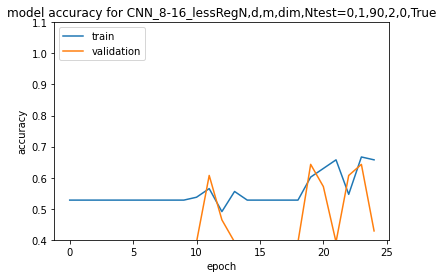

In [52]:
# summarize history for accuracy
plt.plot(training_history[model_name+data_params].history['accuracy'])
plt.plot(training_history[model_name+data_params].history['val_accuracy'])
plt.title(f"model accuracy for "+model_name+data_params)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.4,1.1])
plt.show()

In [53]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

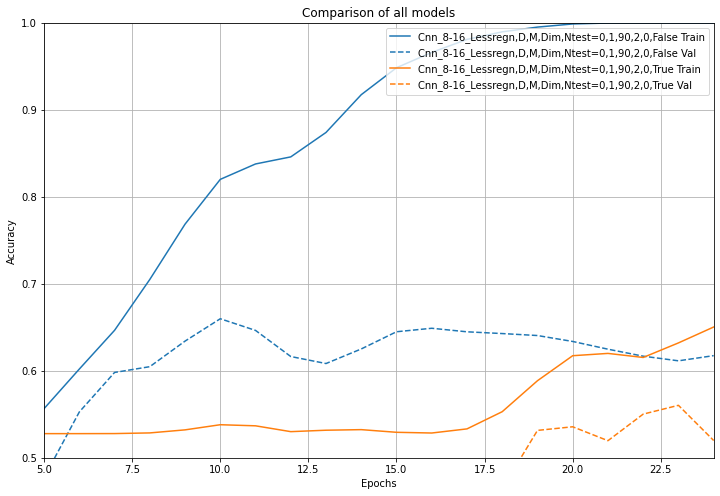

In [54]:
# Instantiate HistoryPlotter
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)

# Plot results of all models

plt.figure(figsize=(12,8)) 
plotter.plot(training_history)
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 1])
plt.xlabel('Epochs')
plt.title('Comparison of all models')
plt.legend(loc='upper right')
plt.savefig("../models/Valle_CNN1_comparison_2.png");

accuracy:  0.48
recall:  0.0
precision:  0.0


,model,data,accuracy,recall,precision
0,CNN_8-16_lessReg,"N,d,m,dim,Ntest=0,1,90,2,0,False",0.61,0.52,0.63
1,CNN_8-16_lessReg,"N,d,m,dim,Ntest=0,1,90,2,0,False",0.57,0.30,0.64
2,CNN_8-16_lessReg,"N,d,m,dim,Ntest=0,1,90,2,0,True",0.50,0.00,0.00
3,CNN_8-16_lessReg,"N,d,m,dim,Ntest=0,1,90,2,0,True",0.48,0.00,0.00


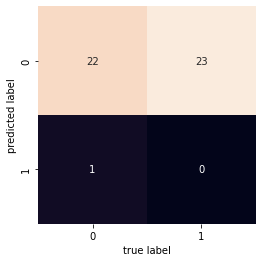

In [55]:
accuracy_score(y_test, y_pred)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

test_performance.append((model_name, data_params, accuracy_score(y_test, y_pred.round()).round(2), recall_score(y_test, y_pred.round()).round(2), precision_score(y_test, y_pred.round()).round(2)))
df_perf = pd.DataFrame(test_performance, columns= ["model", "data", "accuracy", "recall", "precision"])
df_perf

In [56]:
df_perf.to_csv("../models/Valle_CNN1_2.csv")